In [ ]:
#### Random Forest ####

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_excel('FinalDF.xlsx')
df.head()

,Unnamed: 0,Date,Summary,Negative,Positive,Neutral,Comp,Open,High,Low,Close,Adj Close,Volume
0,0,2021-01-11,Few companies drive stock market across the wo...,0.021,0.177,0.802,0.9739,1938.800049,1938.800049,1892.500000,1897.250000,1891.166260,15371556
1,1,2021-01-12,"Reliance Industries (RIL) is a good stock?,The...",0.056,0.101,0.843,0.8820,1903.000000,1960.000000,1899.900024,1957.050049,1950.774536,18996047
2,2,2021-01-13,HDFC Bank has replaced Reliance Industries to ...,0.045,0.029,0.927,-0.1280,1963.550049,1974.949951,1918.449951,1938.800049,1932.583130,12284876
3,3,2021-01-14,reliance Bhartiartl drreddy cipla biocon \n m...,0.054,0.038,0.908,-0.1873,1945.000000,1966.900024,1939.050049,1960.599976,1954.313110,9946818
4,4,2021-01-15,"On Friday, Reliance shares fell nearly 4% to R...",0.033,0.155,0.813,0.8957,1960.599976,1973.800049,1920.050049,1937.449951,1931.237305,9503790


In [5]:
df_1 = df[["Negative","Positive","Neutral","Comp","Adj Close"]]

df_1.head()

,Negative,Positive,Neutral,Comp,Adj Close
0,0.021,0.177,0.802,0.9739,1891.166260
1,0.056,0.101,0.843,0.8820,1950.774536
2,0.045,0.029,0.927,-0.1280,1932.583130
3,0.054,0.038,0.908,-0.1873,1954.313110
4,0.033,0.155,0.813,0.8957,1931.237305


In [6]:
# Drop null values
df_1.dropna(inplace = True)
df_1.head()

<ipython-input-6-aaa4d2e5c635>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.dropna(inplace = True)


,Negative,Positive,Neutral,Comp,Adj Close
0,0.021,0.177,0.802,0.9739,1891.166260
1,0.056,0.101,0.843,0.8820,1950.774536
2,0.045,0.029,0.927,-0.1280,1932.583130
3,0.054,0.038,0.908,-0.1873,1954.313110
4,0.033,0.155,0.813,0.8957,1931.237305


In [7]:
df_1.dtypes

Negative     float64
Positive     float64
Neutral      float64
Comp         float64
Adj Close    float64
dtype: object

In [15]:
X = df_1.drop('Adj Close',axis=1)
Y = df_1['Adj Close']

In [46]:
X = df_1[['Positive','Negative']]
Y = df_1[['Adj Close']]

In [47]:
X

,Positive,Negative
0,0.177,0.021
1,0.101,0.056
2,0.029,0.045
3,0.038,0.054
4,0.155,0.033
...,...,...
240,0.092,0.024
241,0.040,0.000
242,0.120,0.020
243,0.092,0.032


In [48]:
Y

,Adj Close
0,1891.166260
1,1950.774536
2,1932.583130
3,1954.313110
4,1931.237305
...,...
240,2403.850098
241,2458.100098
242,2469.600098
243,2416.500000


In [49]:
X_train_data, X_val_data,X_test_data = X[0:int(len(df_1)*0.7)], X[int(len(df_1)*0.7):int(len(df_1)*0.85)],X[int(len(df_1)*0.7):]
Y_train_data, Y_val_data,Y_test_data = Y[0:int(len(df_1)*0.7)], Y[int(len(df_1)*0.7):int(len(df_1)*0.85)],Y[int(len(df_1)*0.7):]

In [56]:
Y_val_data.head()

,Adj Close
171,2489.899902
172,2482.699951
173,2524.449951
174,2548.050049
175,2527.850098


In [50]:
X_train_data.head()

,Positive,Negative
0,0.177,0.021
1,0.101,0.056
2,0.029,0.045
3,0.038,0.054
4,0.155,0.033


In [51]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

In [52]:
rfc = RandomForestRegressor(n_estimators =200)

In [53]:
rfc.fit(X_train_data,Y_train_data)

<ipython-input-53-64fea2ed05ef>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_data,Y_train_data)


RandomForestRegressor(n_estimators=200)

In [57]:
y_pred = rfc.predict(X_val_data)

In [59]:
y_pred

array([2183.70975331, 2156.48845775, 2176.98276471, 2050.73109159,
       2082.13672069, 2101.27839076, 1956.5984736 , 2059.87215947,
       2186.03345206, 2003.69390133, 2059.7080286 , 2122.69026811,
       2081.54650511, 2124.3492459 , 2039.83343373, 2106.29321034,
       2018.95913326, 2072.53398707, 2103.37856623, 1959.62037997,
       2046.23636826, 1991.66895317, 2071.87025027, 2140.82073794,
       2008.75471843, 2125.70126499, 2148.71393119, 2054.30424675,
       2137.0876292 , 2183.72726055, 2039.79852786, 2148.68733411,
       1999.46951535, 2070.2249895 , 2109.86695739, 2222.32685581,
       2143.55393559])

In [58]:
df_pred=pd.DataFrame({'Actual':Y_val_data, 'Predicted':y_pred})
df_pred

ValueError: Shape of passed values is (1, 2), indices imply (37, 2)

In [24]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_val_data, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_val_data, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_val_data, y_pred)))

Mean Absolute Error: 496.8033024551272
Mean Squared Error: 253630.03711955462
Root Mean Squared Error: 503.6169547578344


In [25]:
# Calculate the absolute errors
errors = abs(y_pred - Y_val_data)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_val_data)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 496.8 degrees.
Accuracy: 80.82 %.


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


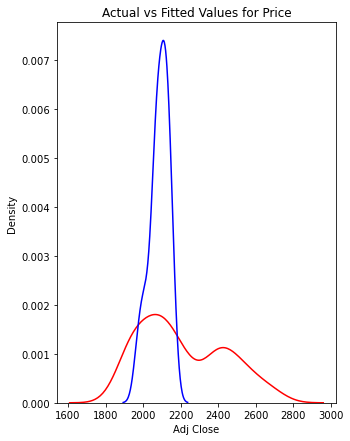

In [26]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

In [18]:
rfc.predict([[0.043,0.095,0.862,0.9461]])

C:\Users\Ronil\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


array([2161.89422292])